# Homework 11

### Felipe Alves N14713445


Consider the problem
\begin{align*}
   \max \ & \mathbb{E} \bigg[ \sum_{t=0}^{\infty} \beta^t u(c_t) \bigg] \\
   \text{S.t. } & y_{t+1} = \xi_{t+1} f (y_{t+1} - c_t)
\end{align*}

where 
* state $y_t$ is a renewable resource
* action $c_t\in[0,y_t]$ for all $t$
* $f$ is a growth function
* $\{\xi_{t+1}\}$ is an iid shock sequence

The code for performing **policy function iteration** and the *look-ahead* estimator of the 
stationary density function can be checked on `hw11.jl` in the submitted folder.
Sorry about that. 
I did most of the work on Julia's REPL and had little time to transfer to the notebook. 

Below I just included the definition of main type
```julia 
type PlannerProblem
```
and the code to generate the figures.

In [ ]:
"""
Planner Problem type

 max_{c} E ∑ u(c_t),    y_{t+1} = ξ_{t+1}f( y_t - c_t )

#### Fields
- `β`               : discount factor
- `u`               : utility function
- `f`               : growth function
- `grid`            : grid of y

- `phi`             : distribution of ξ
- `quad_nodes`      :
- `quad_weights`    :
- `ξ_sample`        : sample for MonteCarlo comp of Exp

- `v`               : value function storage
- `σ`               : policy function storage

"""
type PlannerProb

    β::Float64
    u::Function
    f::Function

    grid::AbstractVector

    phi::Distribution
    quad_nodes::Vector
    quad_weights::Vector
    ξ_samp::Vector

    v::Vector{Float64}
    σ::Vector{Float64}

end

### Building Picture

β = 0.94 
Iteration 01 with error : 0.095145
Iteration 02 with error : 0.029016
Iteration 03 with error : 0.000002
Iteration 04 with error : 0.000000
..................................................
β = 0.945 
Iteration 01 with error : 0.191063
Iteration 02 with error : 0.107924
Iteration 03 with error : 0.000167
Iteration 04 with error : 0.000000
..................................................
β = 0.95 
Iteration 01 with error : 0.144546
Iteration 02 with error : 0.092471
Iteration 03 with error : 0.000067
Iteration 04 with error : 0.000000
..................................................
β = 0.955 
Iteration 01 with error : 0.117284
Iteration 02 with error : 0.114379
Iteration 03 with error : 0.000273
Iteration 04 with error : 0.000000
..................................................
β = 0.96 
Iteration 01 with error : 0.247918
Iteration 02 with error : 0.066920
Iteration 03 with error : 0.000019
Iteration 04 with error : 0.000000
............................................

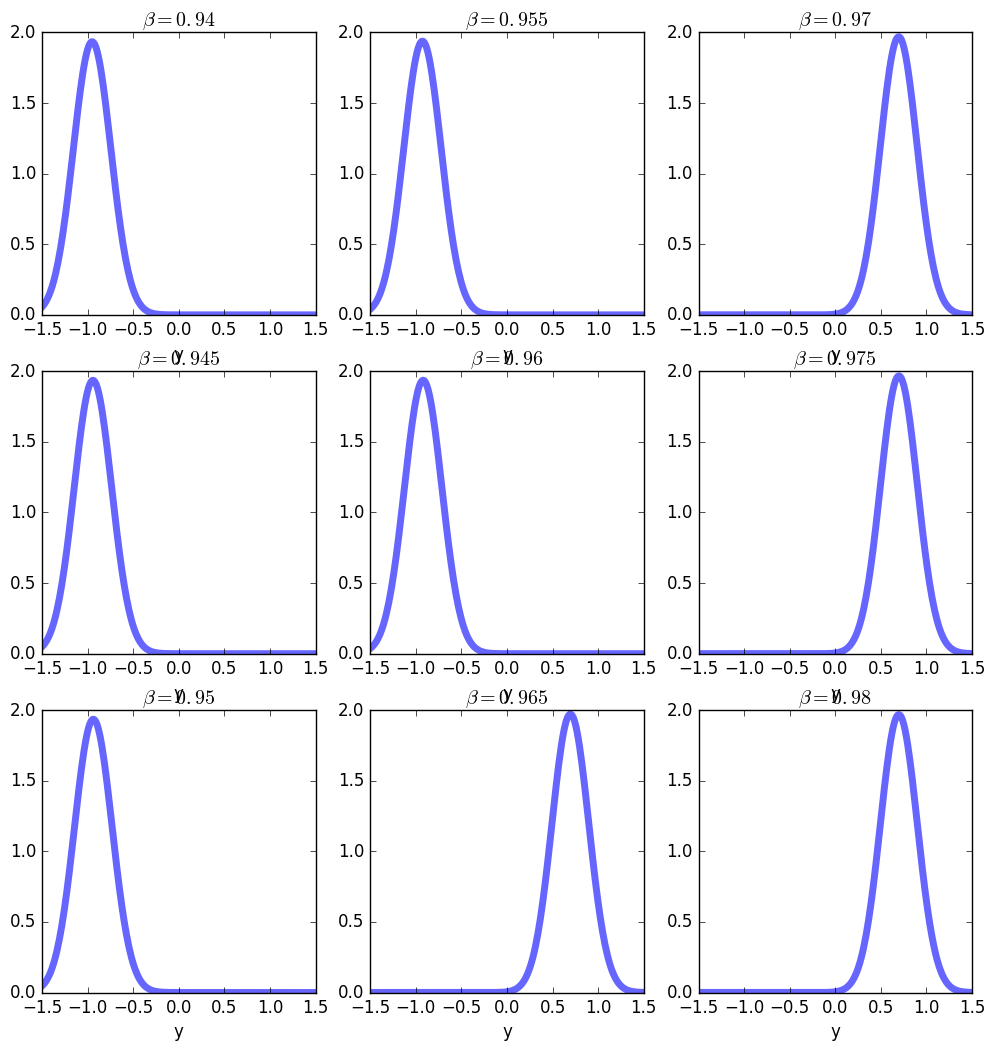

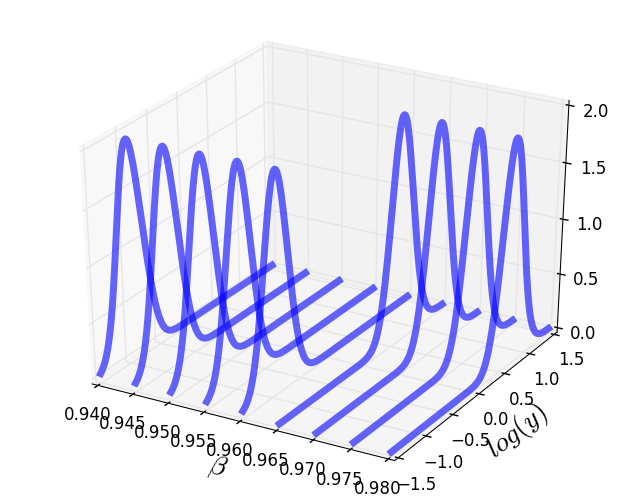

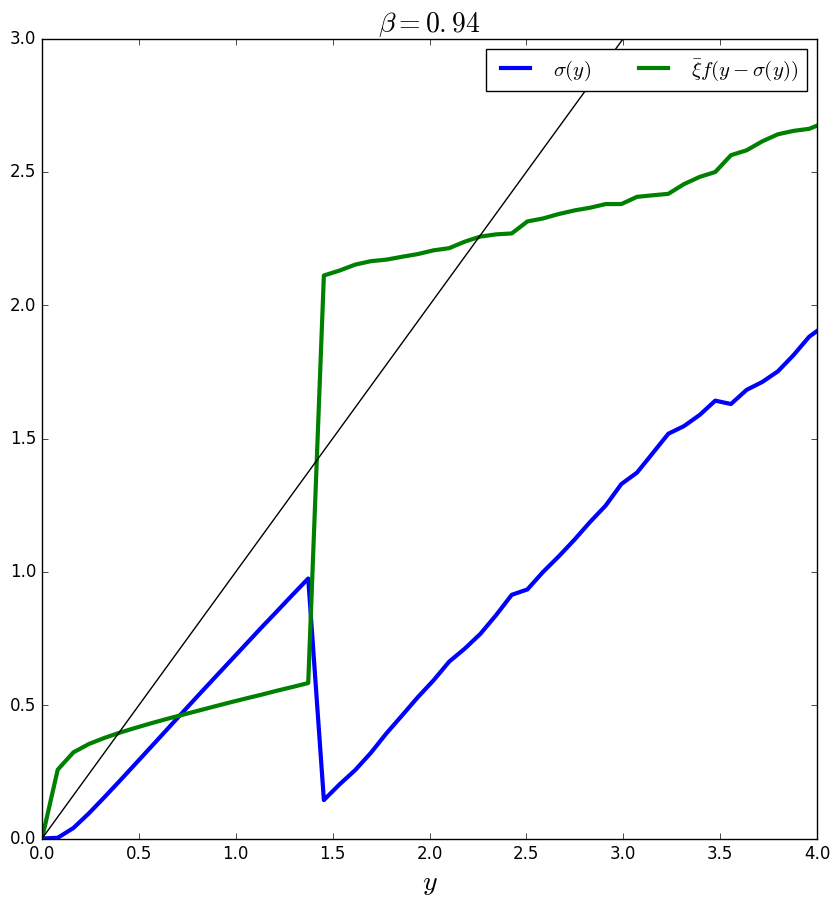

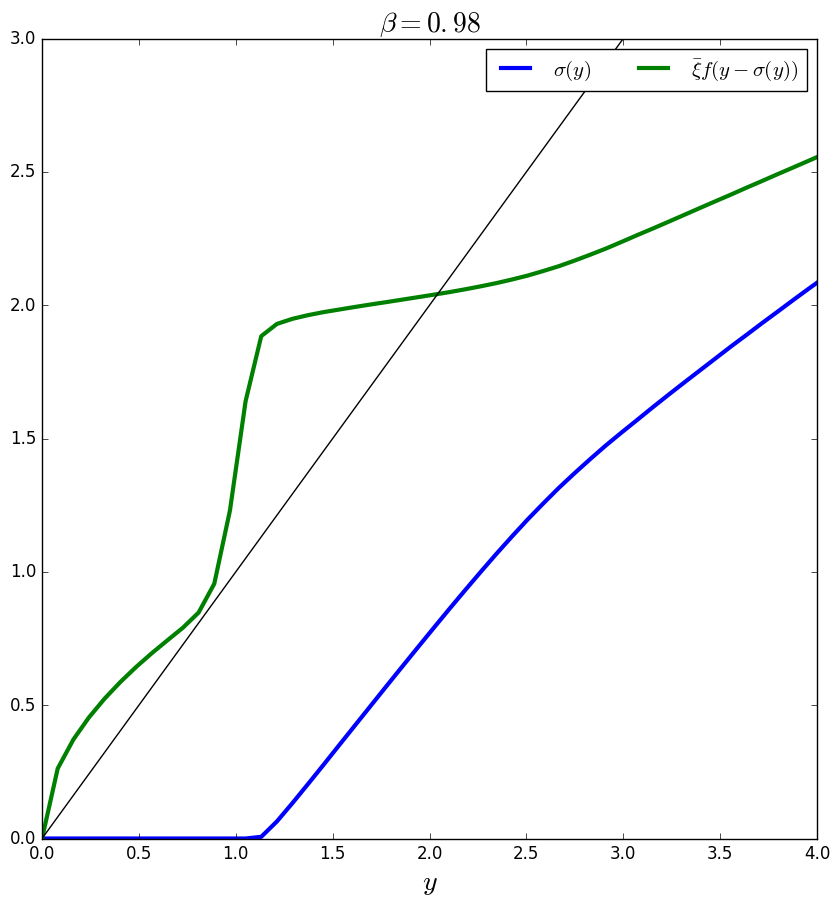

In [8]:
##############################################################################
##
## GRAPH
##
##############################################################################
using PyPlot
include("hw11.jl")

βvals = collect(0.94:0.005:0.98)
pps = PlannerProb[PlannerProblem(β;  sig = 0.2, mu =-0.1, grid_size = 100)
                for β in βvals]

xmax = 8.0
# ygrid = linspace(0.01, xmax, 500)
ygrid = linspace(log(0.01), log(xmax), 500)

#== FIGURE 1 - subplots ==#
fig, axes = subplots(3,3,figsize = (12,12))

#== FIGURE 2 - 3D ==#
fig2 = figure()
ax2 = fig2[:gca](projection="3d")
ax2[:set_xlim3d](βvals[1],βvals[end])
ax2[:set_xticks](βvals)
ax2[:set_xlabel](L"\beta" ,fontsize = 20)
# ax2[:set_ylim3d](0.20, exp(1.5))
ax2[:set_ylim3d](-1.5, 1.5)
ax2[:set_ylabel](L"log(y)" ,fontsize = 20)
ax2[:set_zlim3d](0, 2)

#== indicides ==#
ind_lw  = searchsortedfirst(ygrid,-1.5)-1
ind_hi = searchsortedfirst(ygrid,1.5)

for i = 1:length(βvals)
    println("β = $(βvals[i]) ")
    pp = pps[i]

    #== Compute policy ==#
    compute_σ_howard(pp; use_quad = false)

    #== Asymptotic dist ==#
    # ψ = asymp_liny_ψ(pp, ygrid)     # for f(y) 
    ψ = asymp_logy_ψ(pp, ygrid)       # for f(log(y))

    #== Policies figures ==#
    if i==1 || i ==length(βvals)
        fig0, ax0 = subplots(figsize = (10,10))
        grid = collect(pp.grid)
        ypri = mean(pp.phi)*pp.f(grid- pp.σ)
        ax0[:plot](grid, pp.σ, lw = 3, label = L"\sigma(y)")
        ax0[:plot](grid, ypri, lw = 3, label = L"\bar{\xi}f(y-\sigma(y))")
        ax0[:plot](grid, grid, "k", lw = 1)

        ax0[:legend](ncol = 2, fontsize = 15)
        ax0[:set_xlim]([0, 4.0])
        ax0[:set_xlabel](L"y",fontsize = 20)
        ax0[:set_title](latexstring("\\beta = $(βvals[i])"),fontsize = 20)
        ax0[:set_ylim]([0, 3.0])
    end

    ax = axes[i]
    # ax[:set_xlim](0.0,exp(1.5))
    ax[:set_xlim](-1.5,1.5)
    ax[:set_title](latexstring("\\beta = $(βvals[i])"))
    ax[:set_xlabel]("y")
    ax[:plot](ygrid, ψ, lw=5, alpha=0.6)

    ax2[:plot3D](ygrid[ind_lw:ind_hi], ψ[ind_lw:ind_hi], βvals[i], zdir="x", color = "blue", alpha = 0.6, lw = 5)

    println("..................................................")
end